<a href="https://colab.research.google.com/github/FerPaye01/Capitulo-4-de-Deep-Learning-for-Vison-Systems---primer-intento-/blob/main/Capitulo4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. CONFIGURACIÓN E IMPORTACIONES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

plt.style.use('seaborn-v0_8')
print(f"Versión de TensorFlow: {tf.__version__}")

Versión de TensorFlow: 2.19.0


2. CARGA DE DATOS (INPUT - Capítulo 1.4)

In [ ]:
try:

    train_X = pd.read_csv('train_X_Clasification.csv', sep=';')
    train_Y = pd.read_csv('train_Y_Clasification.csv')
    test_X = pd.read_csv('test_X_Clasification.csv', sep=';')
    test_Y = pd.read_csv('test_Y_Clasification.csv')

    print("✅ Datos cargados exitosamente.")
    print(f"Dimensiones de Entrenamiento: X={train_X.shape}, Y={train_Y.shape}")
    print(f"Dimensiones de Prueba: X={test_X.shape}, Y={test_Y.shape}")
except Exception as e:
    print(f"❌ Error al cargar datos: {e}")

print("\n--- Muestra de Datos (Train X) ---")
print(train_X.head())

✅ Datos cargados exitosamente.
Dimensiones de Entrenamiento: X=(1000, 3), Y=(1000, 1)
Dimensiones de Prueba: X=(300, 3), Y=(300, 1)

--- Muestra de Datos (Train X) ---
   Nota_01  Nota_02  Nota_03
0       16        1        9
1        1       11       11
2        5       14        6
3       13       13       17
4        5       10        8


3. PREPROCESAMIENTO (Capítulo 1.5)

In [ ]:
# Técnica: Normalización (Standard Scaling)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(train_X)
X_test_scaled = scaler.transform(test_X)

# Convertimos las etiquetas a arrays de numpy
y_train = train_Y.values
y_test = test_Y.values

print("\n✅ Datos normalizados (Media ~0, Desviación Std ~1)")


✅ Datos normalizados (Media ~0, Desviación Std ~1)


4. ARQUITECTURA DEL MODELO (Capítulo 1.7 / 2.2)

In [ ]:
import tensorflow as tf
import keras


keras.backend.clear_session()
tf.compat.v1.reset_default_graph()

import gc
gc.collect()


model = keras.Sequential()
model.add(keras.layers.Dense(8, input_dim=3, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)))
# tratando el problema de Internal Covariance Shift
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(4, activation='relu', kernel_regularizer=keras.regularizers.l2(0.005)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1, activation='sigmoid'))

# Compilación con métricas exhaustivas
model.compile(
    optimizer=Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999
),
    loss='binary_crossentropy', # Función de error estándar para clasificación binaria
    metrics=['accuracy']
)

model.summary()





/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 4)              │            16 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 24 (96.00 B)

5. ENTRENAMIENTO (Learning Algorithm)

In [ ]:
# Técnica: Early Stopping para detener si no mejora (Optimización profesional)
early_stop = EarlyStopping(monitor='val_loss', patience=10, min_delta=0.001, verbose=1)

print("\n🚀 Iniciando entrenamiento...")
history = model.fit(
    X_train_scaled, y_train,
    epochs=1000,
    batch_size=32,
    validation_split=0.3,
    callbacks=[early_stop],
    verbose=1
)


🚀 Iniciando entrenamiento...
Epoch 1/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.4511 - loss: 1.0435 - val_accuracy: 0.5500 - val_loss: 0.7652
Epoch 2/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5483 - loss: 0.8875 - val_accuracy: 0.5300 - val_loss: 0.7476
Epoch 3/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6129 - loss: 0.7798 - val_accuracy: 0.5700 - val_loss: 0.7320
Epoch 4/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6399 - loss: 0.7294 - val_accuracy: 0.6000 - val_loss: 0.7113
Epoch 5/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6768 - loss: 0.6469 - val_accuracy: 0.6667 - val_loss: 0.6882
Epoch 6/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7488 - loss: 0.5805 - val_accuracy: 0.7533 - val_loss: 0.6609
Epoch 7/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7665 - loss: 0.5580 - val_accuracy: 0.8400 - val_loss: 0.6346
Epoch 8/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8006 - 

6. EVALUACIÓN Y MÉTRICAS (Capítulo 4 / Expectativa Cap 7)

In [ ]:

loss, acc = model.evaluate(X_test_scaled, y_test, verbose=0)
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

print("\n" + "="*40)
print(f"RESULTADOS FINALES DEL MODELO")
print("="*40)
print(f"🎯 Exactitud (Accuracy) en Test: {acc*100:.2f}%")

# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
print("\n--- Matriz de Confusión ---")
print(cm)

# Reporte de Clasificación Completo (Precision, Recall, F1-Score)
print("\n--- Reporte de Clasificación ---")
print(classification_report(y_test, y_pred, target_names=['Desaprobado (0)', 'Aprobado (1)']))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

RESULTADOS FINALES DEL MODELO
🎯 Exactitud (Accuracy) en Test: 99.33%

--- Matriz de Confusión ---
[[171   0]
 [  2 127]]

--- Reporte de Clasificación ---
                 precision    recall  f1-score   support

Desaprobado (0)       0.99      1.00      0.99       171
   Aprobado (1)       1.00      0.98      0.99       129

       accuracy                           0.99       300
      macro avg       0.99      0.99      0.99       300
   weighted avg       0.99      0.99      0.99       300



In [ ]:
print(loss, acc)

0.030287593603134155 0.9933333396911621


7. VISUALIZACIÓN DE RESULTADOS

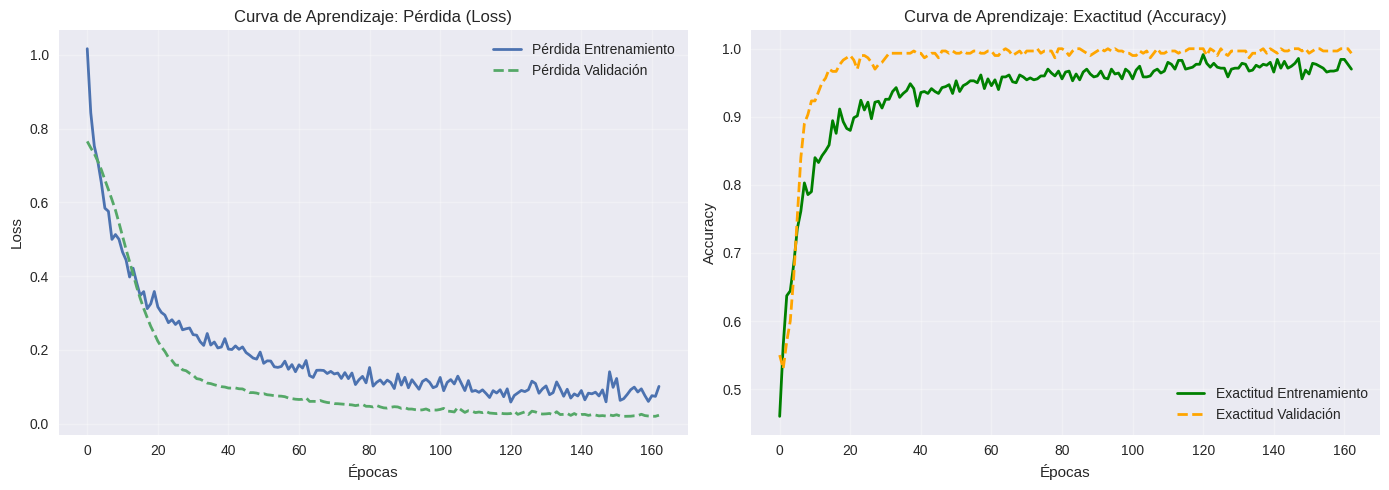

In [ ]:
plt.figure(figsize=(14, 5))

# Gráfica de Pérdida (Loss)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida Entrenamiento', linewidth=2)
plt.plot(history.history['val_loss'], label='Pérdida Validación', linewidth=2, linestyle='--')
plt.title('Curva de Aprendizaje: Pérdida (Loss)', fontsize=12)
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfica de Exactitud (Accuracy)
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Exactitud Entrenamiento', color='green', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Exactitud Validación', color='orange', linewidth=2, linestyle='--')
plt.title('Curva de Aprendizaje: Exactitud (Accuracy)', fontsize=12)
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



8. Visualización de la Matriz de Confusión

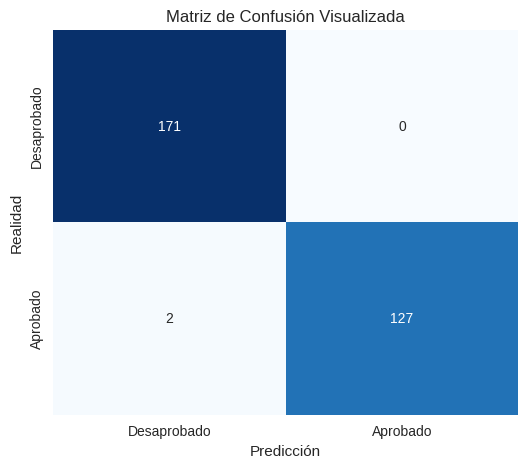

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Desaprobado', 'Aprobado'],
            yticklabels=['Desaprobado', 'Aprobado'])
plt.title('Matriz de Confusión Visualizada')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

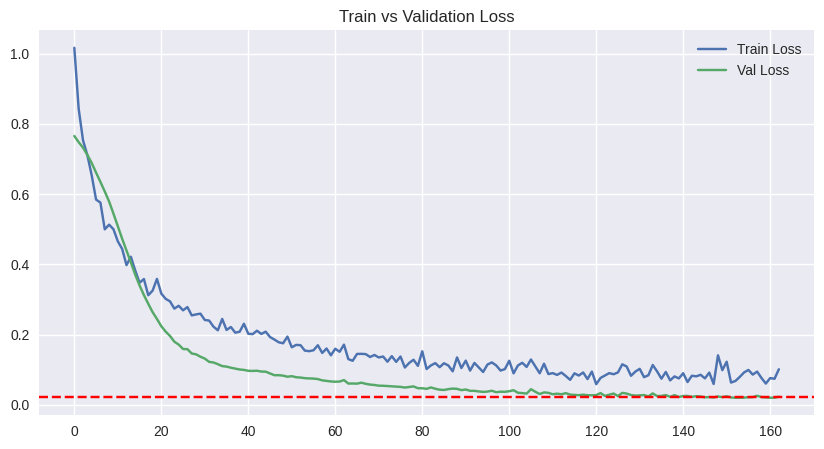

In [ ]:
import matplotlib.pyplot as plt

# Graficar loss vs val_loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.axhline(y=history.history['val_loss'][-1], color='r', linestyle='--')
plt.legend()
plt.title('Train vs Validation Loss')
plt.show()